<h1> Integrated Project - Insurance Claims</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("insurance_claims_raw.xlsx")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


<h2> Data Processing</h2>

Missing Values

In [4]:
df.isnull().sum()

months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             2
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [4]:
df.drop(columns=['_c39'], inplace=True)

In [5]:
# Impute missing values for numerical columns
df['age'].fillna(df['age'].mean(), inplace=True)
df['policy_deductable'].fillna(df['policy_deductable'].mean(), inplace=True)
df['policy_annual_premium'].fillna(df['policy_annual_premium'].mean(), inplace=True)
df['capital-gains'].fillna(df['capital-gains'].mean(), inplace=True)
df['total_claim_amount'].fillna(df['total_claim_amount'].mean(), inplace=True)
df['injury_claim'].fillna(df['injury_claim'].mean(), inplace=True)
df['property_claim'].fillna(df['property_claim'].mean(), inplace=True)

# Impute missing values for categorical columns
df['insured_education_level'].fillna(df['insured_education_level'].mode()[0], inplace=True)
df['insured_hobbies'].fillna('Unknown', inplace=True)
df['authorities_contacted'].fillna('Unknown', inplace=True)
df['incident_state'].fillna('Unknown', inplace=True)

In [6]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Total premium - total claim amount = profit per client
group by features like age occupation etc 
number of claims
number of fraudulent claims per group


In [8]:
df_cleaned = pd.DataFrame(df)

In [9]:
# Save to Excel
excel_file_path = 'cleaned_data.xlsx'
df_cleaned.to_excel(excel_file_path, index=False)
print(f'DataFrame saved as Excel file: {excel_file_path}')

DataFrame saved as Excel file: cleaned_data.xlsx


In [43]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.962926,546238.648000,1134.268537,1257.001113,1.101000e+06,501214.488000,25176.452906,-26793.700000,11.644000,1.83900,0.992000,1.487000,52767.469880,7434.944945,7398.628629,37928.950000,2005.103000
std,115.113174,9.126276,257063.005276,610.639744,243.898011,2.297407e+06,71701.610941,27849.459762,28104.096686,6.951373,1.01888,0.820127,1.111335,26352.431456,4880.713630,4824.634340,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1090.567500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41962.500000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,57880.000000,6780.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70532.500000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


<h2>Problem Statement</h2>

Objective: The primary objective of this project is to analyze the profitability of insurance clients by examining various factors that impact profit margins, such as age, occupation, incident severity, and policy details. The goal is to identify trends and insights that can help the insurance company optimize its client portfolio and improve overall profitability.

In [71]:
# Calculate total premiums paid by each client
df['total_premiums_paid'] = (df['months_as_customer'] / 12) * df['policy_annual_premium']

# Calculate profit per client
df['profit'] = df['total_premiums_paid'] - df['total_claim_amount']

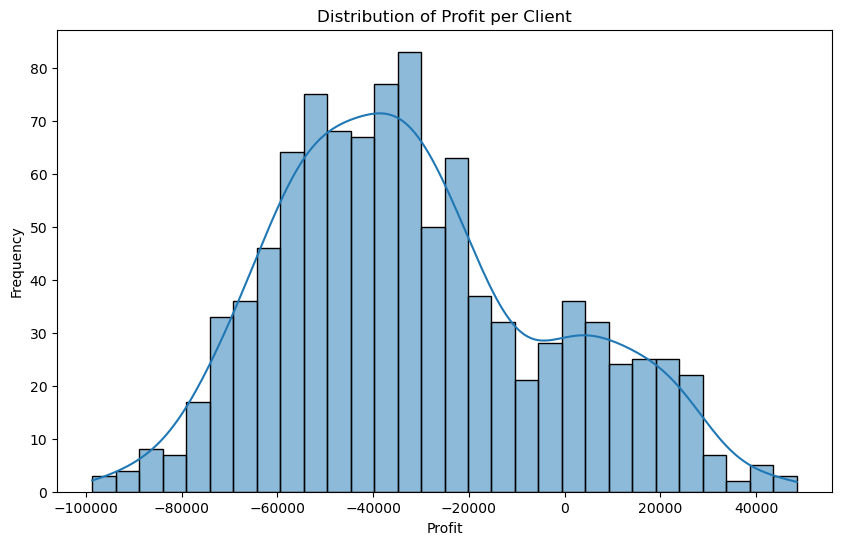

In [72]:
# Distribution of profit
plt.figure(figsize=(10, 6))
sns.histplot(df['profit'], bins=30, kde=True)
plt.title('Distribution of Profit per Client')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

In [73]:
# Group by age and calculate average profit
age_profit = df.groupby('age')['profit'].mean().reset_index()

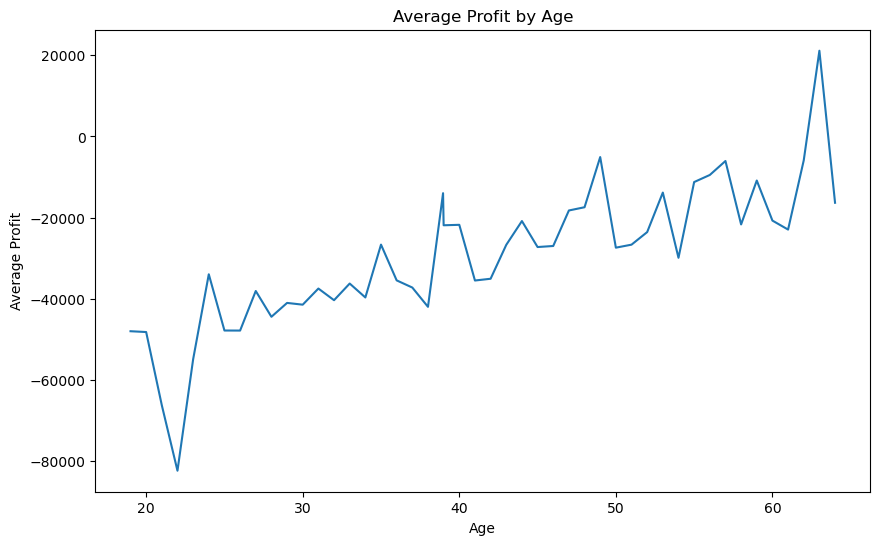

In [74]:
# Average profit by age
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_profit, x='age', y='profit')
plt.title('Average Profit by Age')
plt.xlabel('Age')
plt.ylabel('Average Profit')
plt.show()


In [82]:

# Calculate profit per client
df['profit'] = df['total_premiums_paid'] - df['total_claim_amount']

In [83]:
# Group by occupation and calculate average profit
occupation_profit = df.groupby('insured_occupation')['profit'].mean().reset_index()


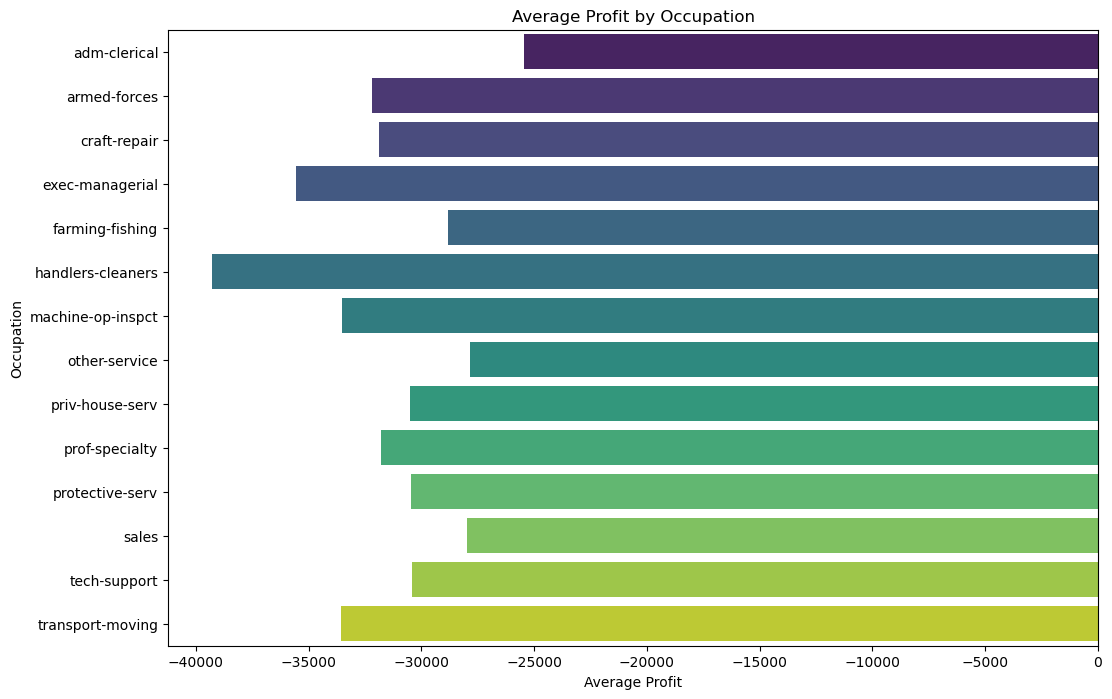

In [84]:
# Average profit by occupation
plt.figure(figsize=(12, 8))
sns.barplot(data=occupation_profit, x='profit', y='insured_occupation', palette='viridis')
plt.title('Average Profit by Occupation')
plt.xlabel('Average Profit')
plt.ylabel('Occupation')
plt.show()

In [69]:
# Number of claims and fraudulent claims by occupation
occupation_claims = df.groupby('insured_occupation').agg({'total_claim_amount': 'count', 'fraud_reported': 'sum'}).reset_index()
occupation_claims.columns = ['insured_occupation', 'total_claims', 'fraudulent_claims']

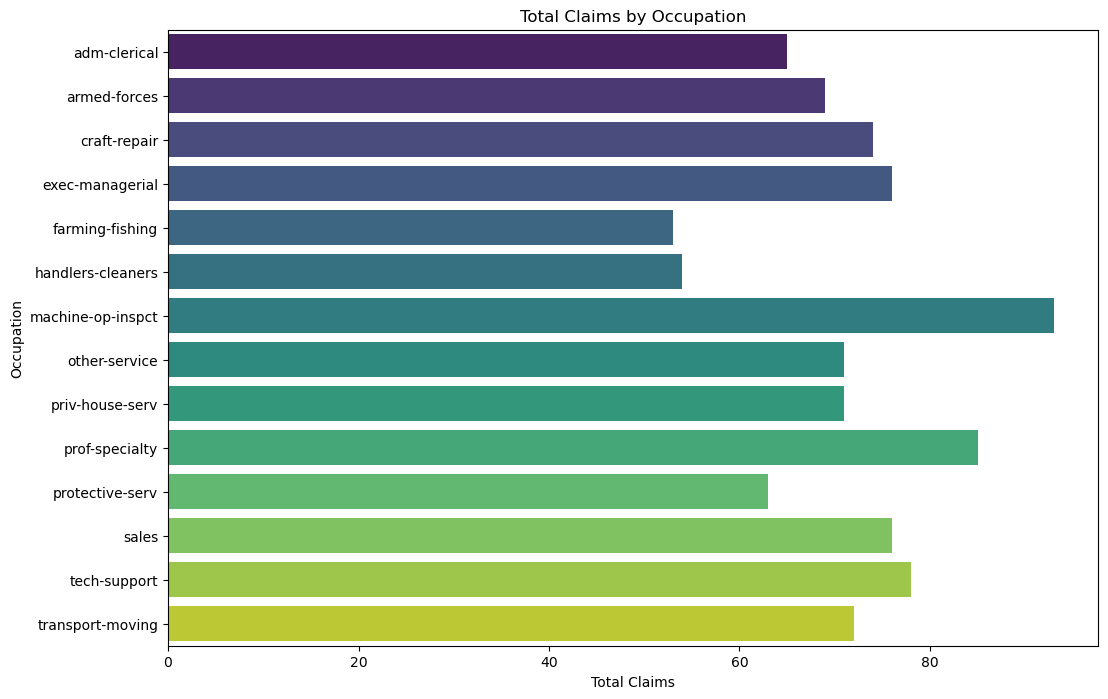

In [70]:
# Claims by occupation
plt.figure(figsize=(12, 8))
sns.barplot(data=occupation_claims, x='total_claims', y='insured_occupation', palette='viridis')
plt.title('Total Claims by Occupation')
plt.xlabel('Total Claims')
plt.ylabel('Occupation')
plt.show()

Get the top n amount of occupations and consider charging a higher premium. Maybe consider encouraging the bottom n occupations by charging a lower premium.

In [55]:
# Convert 'fraud_reported' to numerical values
df['fraud_reported'] = df['fraud_reported'].apply(lambda x: 1 if x == 'Y' else 0)

In [56]:
# Number of claims and fraudulent claims by occupation
occupation_claims = df.groupby('insured_occupation').agg({'total_claim_amount': 'count', 'fraud_reported': 'sum'}).reset_index()
occupation_claims.columns = ['insured_occupation', 'total_claims', 'fraudulent_claims']


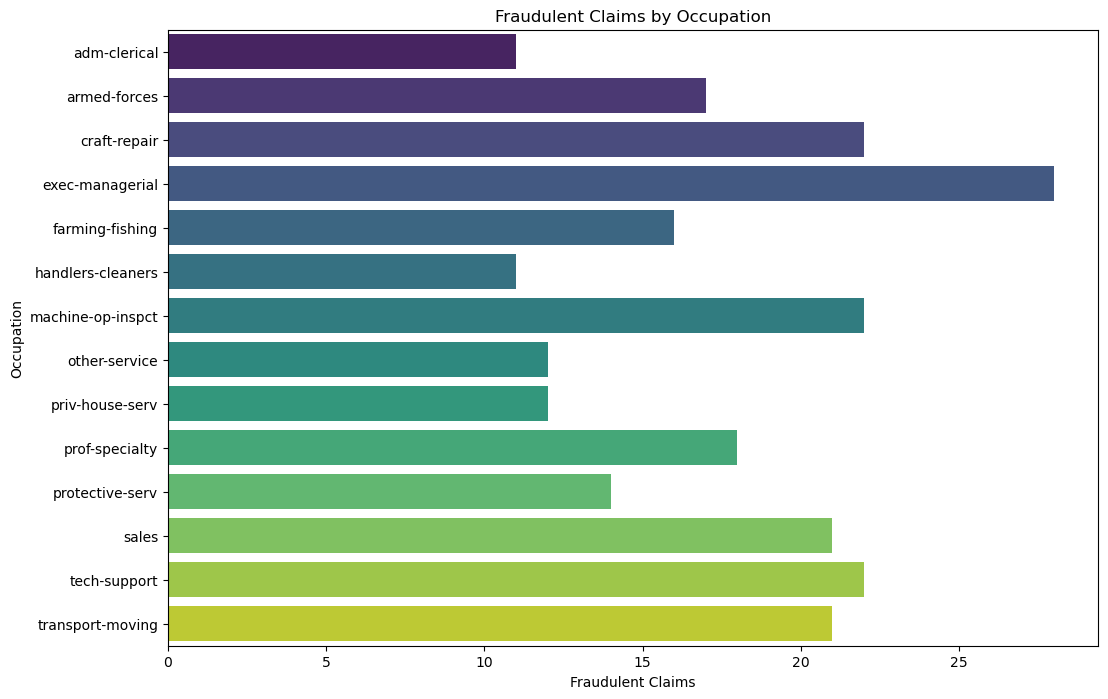

In [57]:

# Fraudulent claims by occupation
plt.figure(figsize=(12, 8))
sns.barplot(data=occupation_claims, x='fraudulent_claims', y='insured_occupation', palette='viridis')
plt.title('Fraudulent Claims by Occupation')
plt.xlabel('Fraudulent Claims')
plt.ylabel('Occupation')
plt.show()

In [77]:
# Group by policy state and calculate average profit
state_profit = df.groupby('policy_state')['profit'].mean().reset_index()

In [78]:
# Example: Binning 'age' into categories
bins = [0, 18, 30, 50, 70, 100]
labels = ['<18', '18-30', '30-50', '50-70', '70+']
df['age_binned'] = pd.cut(df['age'], bins=bins, labels=labels)

In [80]:

# Calculate profit per client
df['profit'] = df['total_premiums_paid'] - df['total_claim_amount']

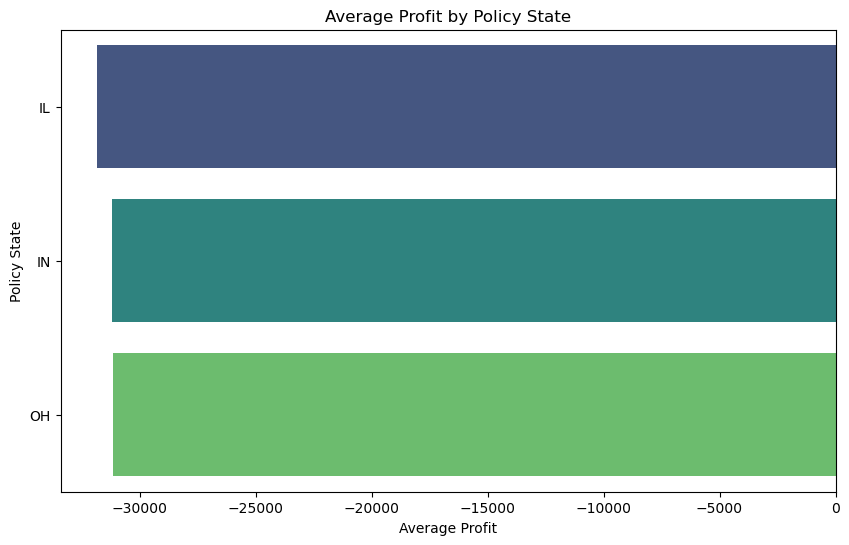

In [81]:
# Average profit by policy state
plt.figure(figsize=(10, 6))
sns.barplot(data=state_profit, x='profit', y='policy_state', palette='viridis')
plt.title('Average Profit by Policy State')
plt.xlabel('Average Profit')
plt.ylabel('Policy State')
plt.show()

In [60]:
# Analyze claim frequency
claim_frequency = df.groupby('policy_state')['total_claim_amount'].count().reset_index()
claim_frequency.columns = ['policy_state', 'claim_frequency']


In [15]:
# Example: Creating a new feature 'claim_ratio'
df['claim_ratio'] = df['total_claim_amount'] / df['policy_annual_premium']

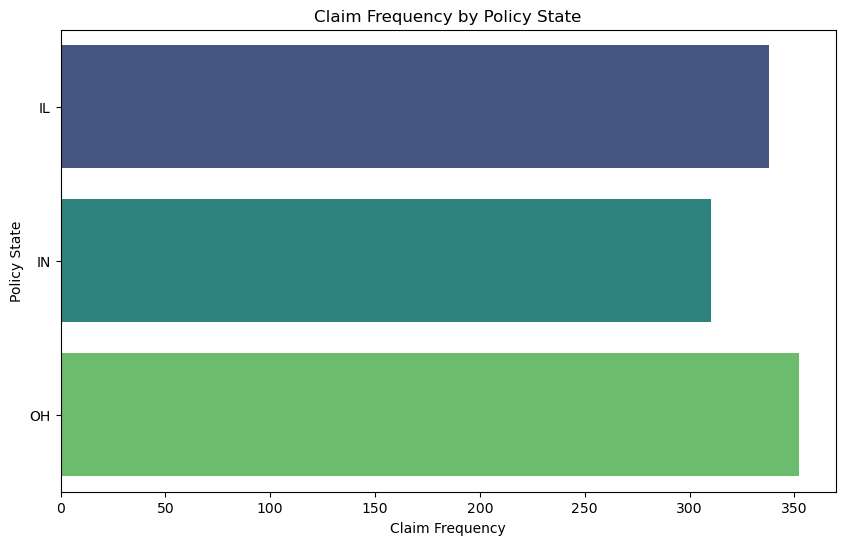

In [61]:
# Claim frequency by policy state
plt.figure(figsize=(10, 6))
sns.barplot(data=claim_frequency, x='claim_frequency', y='policy_state', palette='viridis')
plt.title('Claim Frequency by Policy State')
plt.xlabel('Claim Frequency')
plt.ylabel('Policy State')
plt.show()

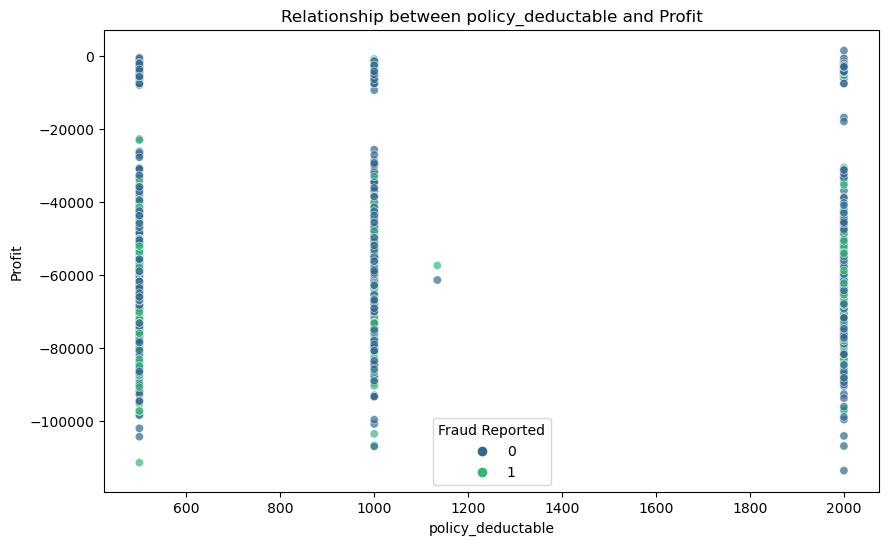

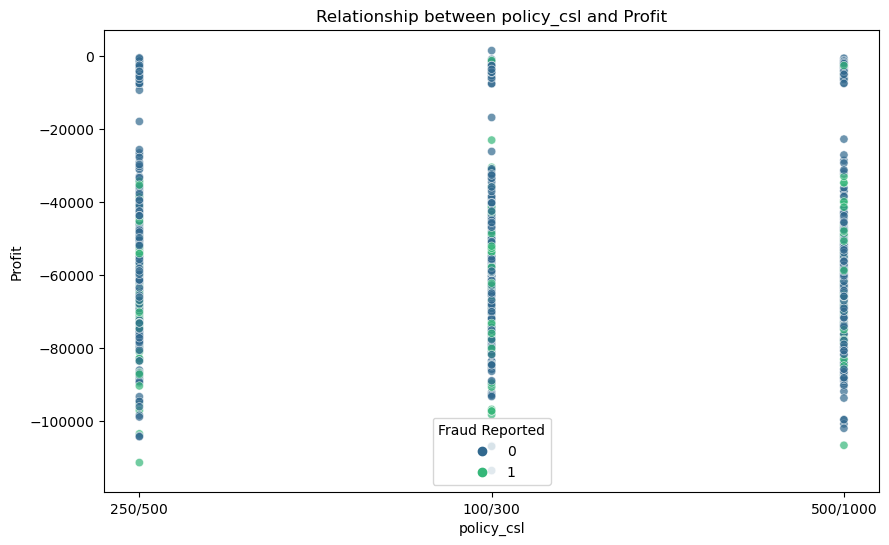

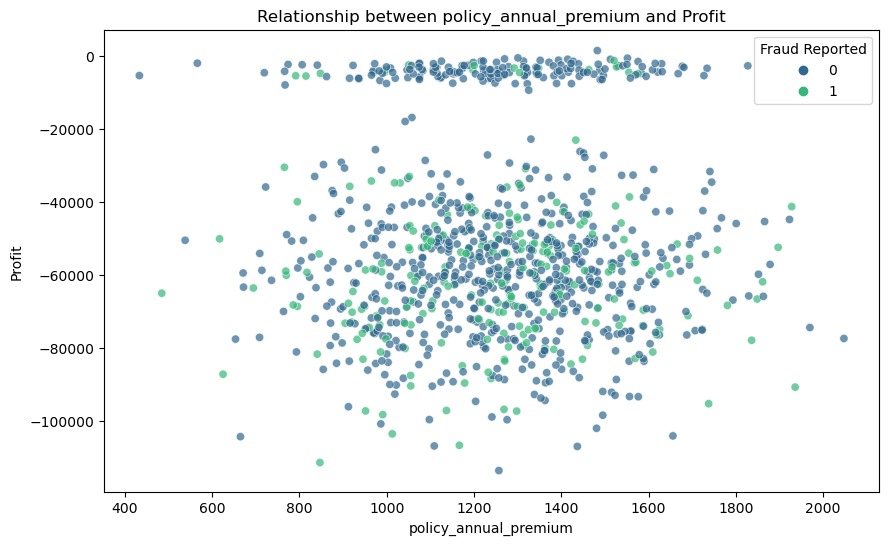

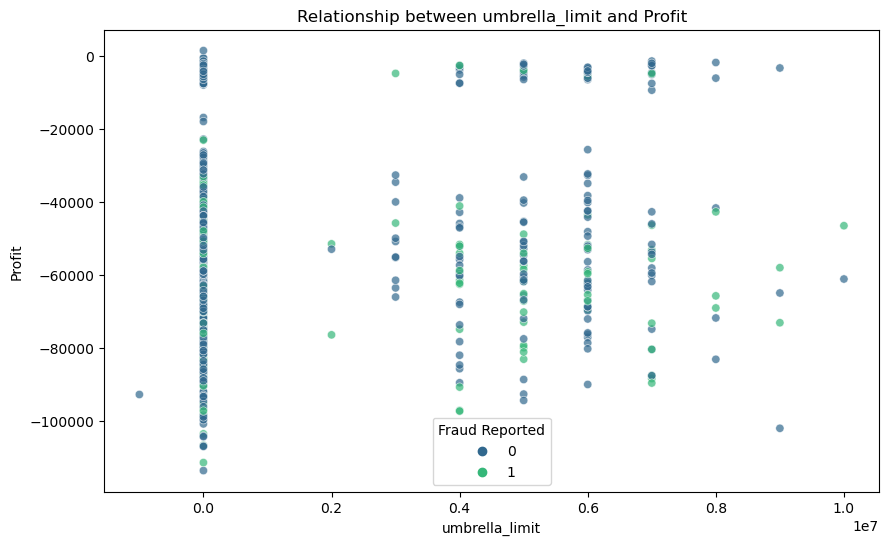

In [62]:
# Analyze the relationship between policy characteristics and profitability
policy_features = ['policy_deductable', 'policy_csl', 'policy_annual_premium', 'umbrella_limit']
for feature in policy_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=feature, y='profit', hue='fraud_reported', palette='viridis', alpha=0.7)
    plt.title(f'Relationship between {feature} and Profit')
    plt.xlabel(feature)
    plt.ylabel('Profit')
    plt.legend(title='Fraud Reported')
    plt.show()

In [5]:
df['insured_education_level'].head()

0           MD
1           MD
2          PhD
3          PhD
4    Associate
Name: insured_education_level, dtype: object